# Data Analysis Project - Bay Area Bike Share

In [1]:
import pandas as pd


In [2]:
import collections

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt;plt.rcdefaults()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from datetime import date,datetime
import calendar
import io

In [5]:
from random import randint
from subprocess import check_output
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import linear_model

C:\Users\Tjpat\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [6]:
df1 = pd.read_csv("station.csv")
df1

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


# Analysis Performed

## 1) Counting no of stations in each of the 5 cities

city
Mountain View     7
Palo Alto         5
Redwood City      7
San Francisco    35
San Jose         16
dtype: int64


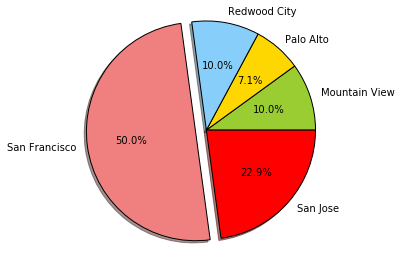

In [7]:
count_stations = df1.groupby(df1['city']).size()
print count_stations

labels = count_stations.index
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']
explode = (0, 0, 0, 0.1,0)

plt.pie(count_stations, explode=explode,colors=colors, labels=labels, shadow=True, autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.show()

## 2) Counting number of docks in each station in each of the 5 cities.

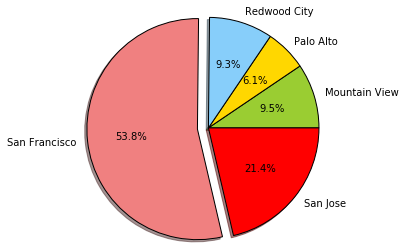

In [8]:
df1_mv = df1[(df1['city'] == 'Mountain View')]
df1_mv = df1_mv.drop(df1_mv.columns[[0,1,2,3,6]], axis=1)
df1_mv = df1_mv['dock_count'].sum()


df1_pa = df1[(df1['city'] == 'Palo Alto')] 
df1_pa = df1_pa.drop(df1_pa.columns[[0,1,2,3,6]], axis=1)
df1_pa = df1_pa['dock_count'].sum()

    
df1_rc = df1[(df1['city'] == 'Redwood City')] 
df1_rc = df1_rc.drop(df1_rc.columns[[0,1,2,3,6]], axis=1)
df1_rc = df1_rc['dock_count'].sum()


df1_sj = df1[(df1['city'] == 'San Jose')] 
df1_sj = df1_sj.drop(df1_sj.columns[[0,1,2,3,6]], axis=1)
df1_sj = df1_sj['dock_count'].sum()


df1_sf = df1[(df1['city'] == 'San Francisco')] 
df1_sf = df1_sf.drop(df1_sf.columns[[0,1,2,3,6]], axis=1)
df1_sf = df1_sf['dock_count'].sum()


#print df1_mv
#print df1_pa
#print df1_rc
#print df1_sj
#print df1_sf

labels = count_stations.index
sizes = [df1_mv, df1_pa, df1_rc, df1_sf,df1_sj ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']
explode = (0, 0, 0, 0.1,0)
plt.pie(sizes, explode=explode,labels=labels,colors=colors, shadow=True, autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.show()

## About 50% of the stations and docks are located in San Francisco, but it makes up 90% of the system use. 

## 3) Calculating total numer of rides taken by users in each city

In [9]:
df4 = pd.read_csv("201608_trip_data.csv")
df4

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2,913467,233,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111
3,913468,213,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
4,913469,574,9/1/2015 1:33,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107
5,913470,623,9/1/2015 1:36,San Jose Diridon Caltrain Station,2,9/1/2015 1:47,Japantown,9,261,Subscriber,95112
6,913471,746,9/1/2015 2:15,Embarcadero at Bryant,54,9/1/2015 2:27,Powell Street BART,39,436,Subscriber,94103
7,913472,1038,9/1/2015 3:38,Townsend at 7th,65,9/1/2015 3:56,Howard at 2nd,63,607,Subscriber,94107
8,913473,424,9/1/2015 4:23,Market at 10th,67,9/1/2015 4:30,Townsend at 7th,65,259,Subscriber,94102
9,913474,633,9/1/2015 4:57,Embarcadero at Bryant,54,9/1/2015 5:08,Embarcadero at Sansome,60,613,Subscriber,94105


In [10]:
df1_rdmv = df1[(df1['city'] == 'Mountain View')]
df1_rdmv = df1_rdmv.drop(df1_rdmv.columns[[2,3,4,6]], axis=1)
df1_rdmv = df1_rdmv.set_index('id')
df1_rdmv = df1_rdmv.index
count_rides = df4.groupby(df4['Start Terminal']).size()

i = 0
rdmv = 0
while i < len(df1_rdmv):
    rdmv += count_rides.ix[df1_rdmv[i]]
    i += 1
print 'The total no of rides in Mountain View city is :' + repr(rdmv)


The total no of rides in Mountain View city is :6512


In [11]:
df1_rdpa = df1[(df1['city'] == 'Palo Alto')]
df1_rdpa = df1_rdpa.drop(df1_rdpa.columns[[2,3,4,6]], axis=1)
df1_rdpa = df1_rdpa.set_index('id')
df1_rdpa = df1_rdpa.index
x = 0
rdpa = 0
while x < len(df1_rdpa):
    rdpa += count_rides.ix[df1_rdpa[x]]
    x += 1
print 'The total no of rides in Palo Alto city is :' + repr(rdpa)

The total no of rides in Palo Alto city is :3116


In [12]:
df1_rdrc = df1[(df1['city'] == 'Redwood City')]
df1_rdrc = df1_rdrc.drop(df1_rdrc.columns[[2,3,4,6]], axis=1)
df1_rdrc = df1_rdrc.set_index('id')
df1_rdrc = df1_rdrc.index
j = 0
rdrc = 0
while j < len(df1_rdrc):
    rdrc += count_rides.ix[df1_rdrc[j]]
    j += 1
print 'The total no of rides in Redwood City is :' + repr(rdrc)


The total no of rides in Redwood City is :1563


In [13]:
df1_rdsf = df1[(df1['city'] == 'San Francisco')]
df1_rdsf = df1_rdsf.drop(df1_rdsf.columns[[2,3,4,6]], axis=1)
df1_rdsf = df1_rdsf.set_index('id')
df1_rdsf = df1_rdsf.index
k = 0
rdsf = 0
while k < len(df1_rdsf):
    rdsf += count_rides.ix[df1_rdsf[k]]
    k += 1
print 'The total no of rides in San Francisco city is :' + repr(rdsf)

The total no of rides in San Francisco city is :287273


In [14]:
df1_rdsj = df1[(df1['city'] == 'San Jose')]
df1_rdsj = df1_rdsj.drop(df1_rdsj.columns[[2,3,4,6]], axis=1)
df1_rdsj = df1_rdsj.set_index('id')
df1_rdsj = df1_rdsj.index
l = 0
rdsj = 0
while l < len(df1_rdsj):
    rdsj += count_rides.ix[df1_rdsj[l]]
    l += 1
print 'The total no of rides in San Jose city is :' + repr(rdsj)

The total no of rides in San Jose city is :14879


In [15]:
diff1 = df4['Start Date'][len(df4)-1]
#- df4['Start Date'][0]
diff1 = datetime.strptime(diff1, "%m/%d/%Y %H:%M")
diff1

diff2 = df4['Start Date'][0]
diff2 = datetime.strptime(diff2, "%m/%d/%Y %H:%M")
diff2

diff = diff1 - diff2
print diff
print 'The difference between the time of first ride and last ride is' + repr(diff)

365 days, 23:22:00
The difference between the time of first ride and last ride isdatetime.timedelta(365, 84120)


### Caluclating total number of rides in the entire time duration from 9/1/2015 to 8/31/2016

In [16]:
tot_rd = rdmv + rdpa + rdrc + rdsf + rdsj
print 'Total number of rides in this entire duration is :' + repr(tot_rd)

Total number of rides in this entire duration is :313343


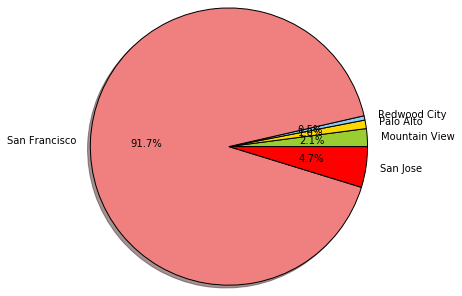

In [17]:
plt.subplots(figsize=(7,5))
labels = count_stations.index
sizes = [rdmv, rdpa, rdrc, rdsf,rdsj ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']
explode = (0, 0, 0, 0,0)
plt.pie(sizes, explode=explode,labels=labels,colors=colors, shadow=True, autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.show()

## The data I analyzed here came from rides between September 1, 2015 and August 31, 2016. In those 365 days 23 hrs 22 minutes and 00 seconds there were 313343 rides

## 4) We can now analyze some popoular start stations and end stations

In [18]:
pop_srt_st = df4['Start Station'].groupby(df4['Start Station']).size()

In [19]:
pop_srt_st.sort(ascending=False)

C:\Users\Tjpat\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



In [20]:
print pop_srt_st[0:10]

Start Station
San Francisco Caltrain (Townsend at 4th)         23591
San Francisco Caltrain 2 (330 Townsend)          22358
Harry Bridges Plaza (Ferry Building)             16128
2nd at Townsend                                  14099
Steuart at Market                                13693
Embarcadero at Sansome                           13424
Temporary Transbay Terminal (Howard at Beale)    13111
Townsend at 7th                                  11170
Market at Sansome                                10970
Market at 10th                                    9937
dtype: int64


In [21]:
print 'The most popular starting station of bay area bike share is ' + repr(pop_srt_st.index[0]) + 'having total rides of ' + repr(pop_srt_st.max())

The most popular starting station of bay area bike share is 'San Francisco Caltrain (Townsend at 4th)'having total rides of 23591


In [22]:
pop_end_st = df4['End Station'].groupby(df4['End Station']).size()

In [23]:
pop_end_st.sort(ascending=False)

C:\Users\Tjpat\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



In [24]:
print pop_end_st[0:10]

End Station
San Francisco Caltrain (Townsend at 4th)         28835
San Francisco Caltrain 2 (330 Townsend)          23596
Harry Bridges Plaza (Ferry Building)             16992
2nd at Townsend                                  15616
Embarcadero at Sansome                           15401
Steuart at Market                                14573
Market at Sansome                                12923
Temporary Transbay Terminal (Howard at Beale)    12397
Townsend at 7th                                  11908
Market at 10th                                    8046
dtype: int64


In [25]:
print 'The most popular ending station of bay area bike share is ' + repr(pop_end_st.index[0]) + 'having total rides of ' + repr(pop_end_st.max())

The most popular ending station of bay area bike share is 'San Francisco Caltrain (Townsend at 4th)'having total rides of 28835


## 5) Now lets analyze Who are the users of bay area bike share

Subscriber Type
Customer       33596
Subscriber    280093
dtype: int64


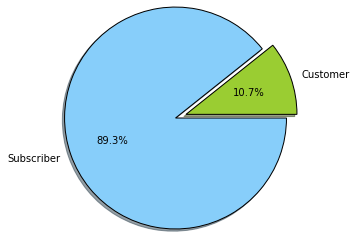

In [26]:
count_customers = df4.groupby(df4['Subscriber Type']).size()
print count_customers

labels = count_customers.index
sizes = count_customers.values
colors = ['yellowgreen','lightskyblue']
explode = (0, 0.1)
plt.pie(sizes, explode=explode,labels=labels,colors=colors, shadow=True, autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.show()

#  Almost 90% of riders have an annual subscription. The remaining 10% of riders were customers who purchased a 24-hour or 3-day pass.

## 6) When is Bay Area Bike Share used?

## First lets see how does users uses bikes in a week 

In [27]:
h = 0
dt_st = []
while h < len(df4['Start Date']):
    dt_st.append(df4['Start Date'][h].split()[0])
    h += 1
#print dt_st

In [28]:
k=0
wkday =[]
while k < len(dt_st):
    wkday.append(calendar.day_name[datetime.strptime(dt_st[k],"%m/%d/%Y").weekday()])
    k += 1
#print wkday

In [29]:
wkd = pd.Series(wkday)
df4['Weekday'] = wkd
#df4

In [30]:
count_wkd = df4.groupby(df4['Weekday']).size()
print count_wkd

Weekday
Friday       50616
Monday       54064
Saturday     15494
Sunday       12984
Thursday     57819
Tuesday      62146
Wednesday    60566
dtype: int64


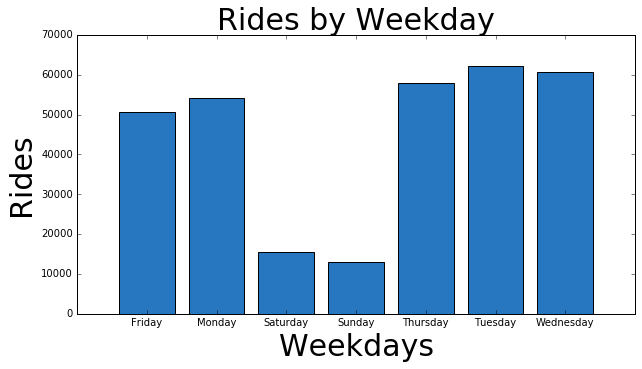

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
objects = count_wkd.index
y_pos = np.arange(len(objects)) 
pt = plt.bar(y_pos, count_wkd, align='center', color='#2677C0')


plt.xticks(y_pos, objects)
plt.ylabel('Rides',fontsize='30')
plt.xlabel('Weekdays',fontsize='30')
plt.title('Rides by Weekday',fontsize='30')


plt.show()

# The above graph clearly shows the usage of bikes during weekdays in the entire duration from 9/1/2015 to 8/31/2016. Now,lets dig deeper to see how different types of users use these bikes during the weekdays 

In [32]:
rdc_sun = df4[(df4['Weekday'] == 'Sunday')] 
rdc_sun = rdc_sun.groupby(rdc_sun['Subscriber Type']).size()
rdc_sun

Subscriber Type
Customer      6221
Subscriber    6763
dtype: int64

In [33]:
rdc_mon = df4[(df4['Weekday'] == 'Monday')] 
rdc_mon = rdc_mon.groupby(rdc_mon['Subscriber Type']).size()
rdc_mon

Subscriber Type
Customer       3673
Subscriber    50391
dtype: int64

In [34]:
rdc_tue = df4[(df4['Weekday'] == 'Tuesday')] 
rdc_tue = rdc_tue.groupby(rdc_tue['Subscriber Type']).size()
rdc_tue

Subscriber Type
Customer       3697
Subscriber    58449
dtype: int64

In [35]:
rdc_wed = df4[(df4['Weekday'] == 'Wednesday')] 
rdc_wed = rdc_wed.groupby(rdc_wed['Subscriber Type']).size()
rdc_wed

Subscriber Type
Customer       3742
Subscriber    56824
dtype: int64

In [36]:
rdc_th = df4[(df4['Weekday'] == 'Thursday')] 
rdc_th = rdc_th.groupby(rdc_th['Subscriber Type']).size()
rdc_th

Subscriber Type
Customer       4161
Subscriber    53658
dtype: int64

In [37]:
rdc_fr = df4[(df4['Weekday'] == 'Friday')] 
rdc_fr = rdc_fr.groupby(rdc_fr['Subscriber Type']).size()
rdc_fr

Subscriber Type
Customer       4983
Subscriber    45633
dtype: int64

In [38]:
rdc_sat = df4[(df4['Weekday'] == 'Saturday')] 
rdc_sat = rdc_sat.groupby(rdc_sat['Subscriber Type']).size()
rdc_sat

Subscriber Type
Customer      7119
Subscriber    8375
dtype: int64

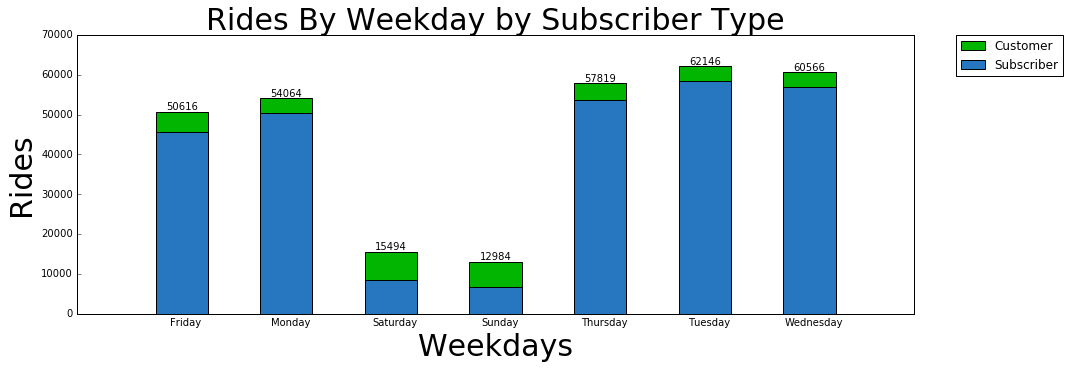

In [39]:
#data to plot
fig, ax = plt.subplots(figsize=(15, 5))
N = 7
customer = (rdc_fr[0],rdc_mon[0],rdc_sat[0],rdc_sun[0],rdc_th[0],rdc_tue[0],rdc_wed[0])
subscriber = (rdc_fr[1],rdc_mon[1],rdc_sat[1],rdc_sun[1],rdc_th[1],rdc_tue[1],rdc_wed[1])
Sum = ('count_wkd[0]','count_wkd[1]','count_wkd[2]','count_wkd[3]','count_wkd[4]','count_wkd[5]','count_wkd[6]')
ind = np.arange(N)
width = 0.5

# create a plot
p1 = plt.bar(ind, customer, width, color = '#01B500',align = 'center',bottom = subscriber)
p2 = plt.bar(ind, subscriber, width, color = '#2677C0',align = 'center')

for r1,r2 in zip(p1,p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x()+r1.get_width()/2., h1+h2, '%d'% (h1+h2), ha = 'center', va='bottom')

plt.ylabel('Rides',fontsize='30')
plt.xlabel('Weekdays',fontsize='30')
#ax.yaxis.label.set_size(25)
plt.title('Rides By Weekday by Subscriber Type',fontsize='30')
plt.xticks(ind+width/12., (count_wkd.index))
#plt.yticks(count_wkd.values)
plt.legend((p1[0], p2[0]), ('Customer', 'Subscriber'), loc = 2, frameon = 'false',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tick_params(top = 'off', bottom = 'off', right = 'off')
#plt.grid(axis = 'y', linestyle = '-')

plt.show()


# By grouping the rides by weekday and analyzing how subscribers' use bay area bike share to customers we get to know that, Weekday riders are overwhelmingly subscribers, and ridership among subscribers falls on weekends so that rides by customers just manage to outnumber them.

# 7) Grouping the rides by time of day:

In [40]:
h = 0
dt_time = []
while h < len(df4['Start Date']):
    dt_time.append(df4['Start Date'][h].split()[1])
    h += 1
#print dt_time

In [41]:
time_rides = {'Morning', 'Daytime', 'Afternoon','Nighttime','Overnight'}
time_rides

{'Afternoon', 'Daytime', 'Morning', 'Nighttime', 'Overnight'}

In [42]:
k=0
daytime =[]
while k < len(dt_time):
    if dt_time[k] >= '10:00'and dt_time[k] <= '14:59':
        daytime.append(dt_time[k])
    k += 1

print len(daytime)

59178


In [43]:
k1=0
afternoon =[]
while k1 < len(dt_time):
    if dt_time[k1] >= '15:00'and dt_time[k1] <= '18:59':
        afternoon.append(dt_time[k1])
    k1 += 1

print len(afternoon)

114573


In [44]:
k2=0
morning =[]
while k2 < len(dt_time):
    if dt_time[k2] >= '6:00'and dt_time[k2] <= '9:59':
        morning.append(dt_time[k2])
    k2 += 1

print len(morning)

109620


In [45]:
k3=0
night =[]
while k3 < len(dt_time):
    if dt_time[k3] >= '19:00'and dt_time[k3] < '23:59':
        night.append(dt_time[k3])
    k3 += 1

print len(night)

27072


In [46]:
k4=0
overnight1 =[]
while k4 < len(dt_time):
    if dt_time[k4] >= '2:00' and dt_time[k4] <= '5:59':
        overnight1.append(dt_time[k4])
    k4 += 1

print len(overnight1)

2473


In [47]:
k4=0
overnight2 =[]
while k4 < len(dt_time):
    if dt_time[k4] >= '0:00' and dt_time[k4] <= '0:59':
        overnight2.append(dt_time[k4])
    k4 += 1

print len(overnight2)

758


In [48]:
k4=0
overnight3 =[]
while k4 < len(dt_time):
    if dt_time[k4] >= '1:00' and dt_time[k4] <= '1:59':
        overnight3.append(dt_time[k4])
    k4 += 1

print len(overnight3)

overnight = overnight1 + overnight2 + overnight3
print len(overnight)

422
3653


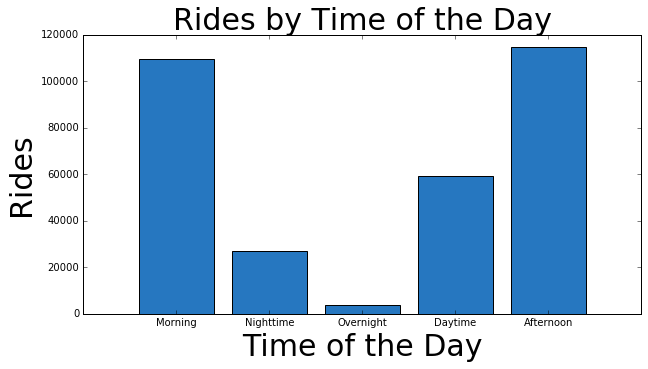

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
objects = time_rides
y_pos = np.arange(len(objects)) 
values = [len(morning),len(night),len(overnight),len(daytime),len(afternoon)]
pt = plt.bar(y_pos, values, align='center', color='#2677C0')


plt.xticks(y_pos, objects)
plt.ylabel('Rides',fontsize='30')
plt.xlabel('Time of the Day',fontsize='30')
plt.title('Rides by Time of the Day',fontsize='30')


plt.show()

# As we can see from the above plot that bay area bike share is mostly used in the afternoon followed my morning.Now we can dig deeper and see that how subscribers and customers use bay area bike during th entire day and also analyze the rides by hour. 

In [50]:
i = 0
lst = []
while i < len(df4):
    if df4['Subscriber Type'][i] == 'Subscriber':
        lst.append(df4['Start Date'][i])
    i += 1
#print lst

In [51]:
i = 0
sub =[]
while i < len(lst):
    sub.append(lst[i].split()[1])
    i += 1
#print sub

In [52]:
k=0
sub_day =[]
while k < len(sub):
    if sub[k] >= '10:00'and sub[k] <= '14:59':
        sub_day.append(sub[k])
    k += 1

print len(sub_day)

45361


In [53]:
k=0
sub_aft =[]
while k < len(sub):
    if sub[k] >= '15:00'and sub[k] <= '18:59':
        sub_aft.append(sub[k])
    k += 1

print len(sub_aft)

103239


In [54]:
k=0
sub_ngt =[]
while k < len(sub):
    if sub[k] >= '19:00'and sub[k] <= '23:59':
        sub_ngt.append(sub[k])
    k += 1

print len(sub_ngt)

23215


In [55]:
k2=0
sub_mor =[]
while k2 < len(sub):
    if sub[k2] >= '6:00'and sub[k2] <= '9:59':
        sub_mor.append(sub[k2])
    k2 += 1

print len(sub_mor)

105469


In [56]:
k2=0
sub_ov1 =[]
while k2 < len(sub):
    if sub[k2] >= '2:00'and sub[k2] <= '5:59':
        sub_ov1.append(sub[k2])
    k2 += 1

print len(sub_ov1)

2231


In [57]:
k2=0
sub_ov2 =[]
while k2 < len(sub):
    if sub[k2] >= '0:00'and sub[k2] <= '0:59':
        sub_ov2.append(sub[k2])
    k2 += 1

print len(sub_ov2)

578


In [58]:
k2=0
sub_ov3 =[]
while k2 < len(sub):
    if sub[k2] >= '1:00'and sub[k2] <= '1:59':
        sub_ov3.append(sub[k2])
    k2 += 1

print len(sub_ov3)

sub_ov = sub_ov1 + sub_ov2 + sub_ov3
len(sub_ov)

291


3100

In [59]:
cus_day = len(daytime) - len(sub_day)
cus_day

13817

In [60]:
cus_aft = len(afternoon) - len(sub_aft)
cus_aft

11334

In [61]:
cus_ngt = len(night) - len(sub_ngt)
cus_ngt

3857

In [62]:
cus_ov = len(overnight) - len(sub_ov)
cus_ov

553

In [63]:
cus_mor = len(morning) - len(sub_mor)
cus_mor

4151

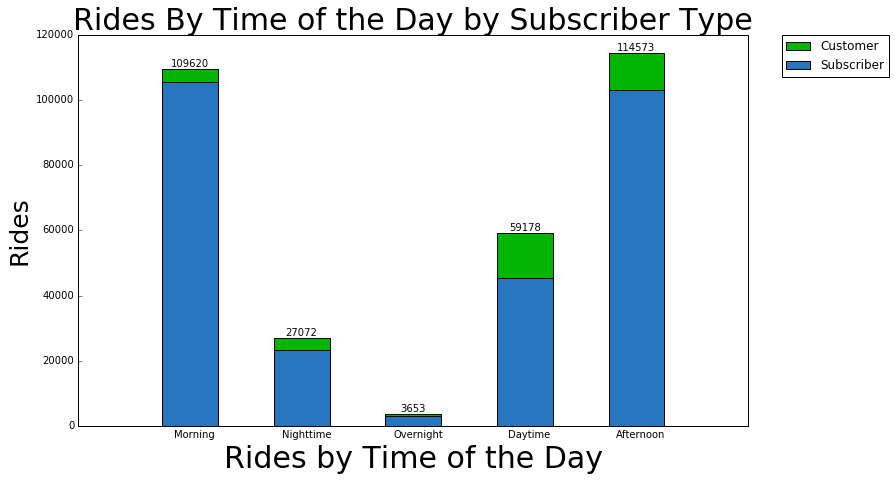

In [64]:
fig, ax = plt.subplots(figsize=(12, 7))
N = 5
customer = (cus_mor,cus_ngt,cus_ov,cus_day,cus_aft)
subscriber = (len(sub_mor),len(sub_ngt),len(sub_ov),len(sub_day),len(sub_aft))
Sum = ('len(morning)','len(night)','len(overnight)','len(daytime)','len(afternoon)')
ind = np.arange(N)
width = 0.5

# create a plot
p1 = plt.bar(ind, customer, width, color = '#01B500',align = 'center',bottom = subscriber)
p2 = plt.bar(ind, subscriber, width, color = '#2677C0',align = 'center')

for r1,r2 in zip(p1,p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x()+r1.get_width()/2., h1+h2, '%d'% (h1+h2), ha = 'center', va='bottom')

plt.ylabel('Rides',fontsize='30')
plt.xlabel('Rides by Time of the Day',fontsize='30')
ax.yaxis.label.set_size(25)
plt.title('Rides By Time of the Day by Subscriber Type',fontsize='30')
plt.xticks(ind+width/12., (time_rides))
#plt.yticks(count_wkd.values)
plt.legend((p1[0], p2[0]), ('Customer', 'Subscriber'), loc = 2, frameon = 'false',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tick_params(top = 'off', bottom = 'off', right = 'off')
#plt.grid(axis = 'y', linestyle = '-')

plt.show()


# 8) Analyzing for Rides by Hour

In [65]:
k=0
afternoon1 =[]
while k < len(afternoon):
    afternoon1.append(datetime.strptime(afternoon[k],"%H:%M").time())
    k += 1
#print afternoon1

In [66]:
y = 0
while y < len(afternoon1):
    afternoon1[y] = afternoon1[y].hour
    y += 1
#print afternoon1


In [67]:
aft = pd.DataFrame(afternoon1)
ct_aft = aft.groupby(aft[0]).size()
ct_aft

0
15    14403
16    29656
17    43597
18    26917
dtype: int64

In [68]:
k=0
morning1 =[]
while k < len(morning):
    morning1.append(datetime.strptime(morning[k],"%H:%M").time())
    k += 1
#print morning1

In [69]:
y = 0
while y < len(morning1):
    morning1[y] = morning1[y].hour
    y += 1


In [70]:
mor = pd.DataFrame(morning1)
ct_mor = mor.groupby(mor[0]).size()
ct_mor

0
6     6207
7    23592
8    46600
9    33221
dtype: int64

In [71]:
k=0
daytime1 =[]
while k < len(daytime):
    daytime1.append(datetime.strptime(daytime[k],"%H:%M").time())
    k += 1
#print daytime1

In [72]:
y = 0
while y < len(daytime1):
    daytime1[y] = daytime1[y].hour
    y += 1


In [73]:
day = pd.DataFrame(daytime1)
ct_day = day.groupby(day[0]).size()
ct_day

0
10    12676
11    11266
12    12566
13    11974
14    10696
dtype: int64

In [74]:
k=0
night1 =[]
while k < len(night):
    night1.append(datetime.strptime(night[k],"%H:%M").time())
    k += 1
#print night1

In [75]:
y = 0
while y < len(night1):
    night1[y] = night1[y].hour
    y += 1


In [76]:
ngt = pd.DataFrame(night1)
ct_ngt = ngt.groupby(ngt[0]).size()
ct_ngt


0
1       422
19    11883
20     6220
21     3981
22     2836
23     1730
dtype: int64

In [77]:
ct_ngt

0
1       422
19    11883
20     6220
21     3981
22     2836
23     1730
dtype: int64

In [78]:
k=0
ovnight1 =[]
while k < len(overnight):
    ovnight1.append(datetime.strptime(overnight[k],"%H:%M").time())
    k += 1
#print ovnight1

In [79]:
y = 0
while y < len(ovnight1):
    ovnight1[y] = ovnight1[y].hour
    y += 1


In [80]:
ovngt = pd.DataFrame(ovnight1)
ct_ovngt = ovngt.groupby(ovngt[0]).size()
ct_ovngt

0
0     758
1     422
2     185
3     263
4     376
5    1649
dtype: int64

In [81]:
tms = pd.Series()

In [82]:
tms = tms.append(ct_ovngt)


In [83]:
tms = tms.append(ct_mor)

In [84]:
tms = tms.append(ct_day)

In [85]:
tms = tms.append(ct_aft)

In [86]:
tms = tms.append(ct_ngt)

In [87]:
tms = tms.drop_duplicates()
tms

0
0       758
1       422
2       185
3       263
4       376
5      1649
6      6207
7     23592
8     46600
9     33221
10    12676
11    11266
12    12566
13    11974
14    10696
15    14403
16    29656
17    43597
18    26917
19    11883
20     6220
21     3981
22     2836
23     1730
dtype: int64

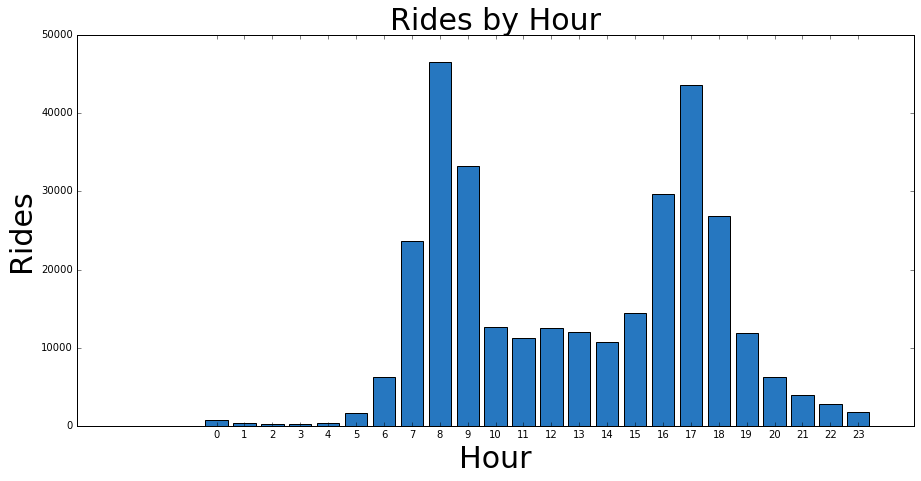

In [88]:
fig, ax = plt.subplots(figsize=(15, 7))
objects = tms.index
y_pos = np.arange(len(objects)) 
pt = plt.bar(y_pos, tms, align='center', color='#2677C0')


plt.xticks(y_pos, objects)
plt.ylabel('Rides',fontsize='30')
plt.xlabel('Hour',fontsize='30')
plt.title('Rides by Hour',fontsize='30')


plt.show()

# Among the users we see spikes in use at 8am and 5pm with another small bump at 12 noon. These users must be riding a bike to get to work, to go to lunch or to head home.

In [89]:
k=0
sub_mor1 =[]
while k < len(sub_mor):
    sub_mor1.append(datetime.strptime(sub_mor[k],"%H:%M").time())
    k += 1
print len(sub_mor1)

105469


In [90]:
k=0
sub_day1 =[]
while k < len(sub_day):
    sub_day1.append(datetime.strptime(sub_day[k],"%H:%M").time())
    k += 1
print len(sub_day1)

45361


In [91]:
k=0
sub_aft1 =[]
while k < len(sub_aft):
    sub_aft1.append(datetime.strptime(sub_aft[k],"%H:%M").time())
    k += 1
print len(sub_aft1)

103239


In [92]:
k=0
sub_ngt1 =[]
while k < len(sub_ngt):
    sub_ngt1.append(datetime.strptime(sub_ngt[k],"%H:%M").time())
    k += 1
print len(sub_ngt1)

23215


In [93]:
k=0
sub_ov1 =[]
while k < len(sub_ov):
    sub_ov1.append(datetime.strptime(sub_ov[k],"%H:%M").time())
    k += 1
print len(sub_ov1)

3100


In [94]:
y = 0
while y < len(sub_mor1):
    sub_mor1[y] = sub_mor1[y].hour
    y += 1

In [95]:
y = 0
while y < len(sub_ngt1):
    sub_ngt1[y] = sub_ngt1[y].hour
    y += 1

In [96]:
y = 0
while y < len(sub_day1):
    sub_day1[y] = sub_day1[y].hour
    y += 1

In [97]:
y = 0
while y < len(sub_aft1):
    sub_aft1[y] = sub_aft1[y].hour
    y += 1

In [98]:
y = 0
while y < len(sub_ov1):
    sub_ov1[y] = sub_ov1[y].hour
    y += 1

In [99]:
sub_mor_df = pd.DataFrame(sub_mor1)
ct_sub_mor = sub_mor_df.groupby(sub_mor_df[0]).size()
ct_sub_mor

0
6     5937
7    22915
8    45168
9    31449
dtype: int64

In [100]:
sub_day_df = pd.DataFrame(sub_day1)
ct_sub_day = sub_day_df.groupby(sub_day_df[0]).size()
ct_sub_day

0
10    10670
11     8637
12     9572
13     8822
14     7660
dtype: int64

In [101]:
dfsub_aft = pd.DataFrame(sub_aft1)
ct_sb_aft = dfsub_aft.groupby(dfsub_aft[0]).size()
ct_sb_aft

0
15    11317
16    26443
17    40726
18    24753
dtype: int64

In [102]:
sub_ngt_df = pd.DataFrame(sub_ngt1)
ct_sub_ngt = sub_ngt_df.groupby(sub_ngt_df[0]).size()
ct_sub_ngt

0
1       291
19    10549
20     5298
21     3376
22     2282
23     1419
dtype: int64

In [103]:
sub_ovngt_df = pd.DataFrame(sub_ov1)
ct_sub_ovngt = sub_ovngt_df.groupby(sub_ovngt_df[0]).size()
ct_sub_ovngt

0
0     578
1     291
2     107
3     227
4     326
5    1571
dtype: int64

In [104]:
ct_cus_aft = ct_aft - ct_sb_aft
ct_cus_aft

0
15    3086
16    3213
17    2871
18    2164
dtype: int64

In [105]:
ct_cus_mor = ct_mor - ct_sub_mor
ct_cus_mor

0
6     270
7     677
8    1432
9    1772
dtype: int64

In [106]:
ct_cus_day = ct_day - ct_sub_day
ct_cus_day

0
10    2006
11    2629
12    2994
13    3152
14    3036
dtype: int64

In [107]:
ct_cus_ov = ct_ovngt - ct_sub_ovngt
ct_cus_ov

0
0    180
1    131
2     78
3     36
4     50
5     78
dtype: int64

In [108]:
ct_cus_ngt = ct_ngt - ct_sub_ngt
ct_cus_ngt

0
1      131
19    1334
20     922
21     605
22     554
23     311
dtype: int64

In [109]:
pd_sub = pd.Series()

In [110]:
pd_sub = pd_sub.append(ct_sub_ovngt)

In [111]:
pd_sub = pd_sub.append(ct_sub_mor)

In [112]:
pd_sub = pd_sub.append(ct_sub_day)

In [113]:
pd_sub = pd_sub.append(ct_sb_aft)

In [114]:
pd_sub = pd_sub.append(ct_sub_ngt)

In [115]:
pd_sub = pd_sub.drop_duplicates()

In [116]:
pd_sub.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name=0)

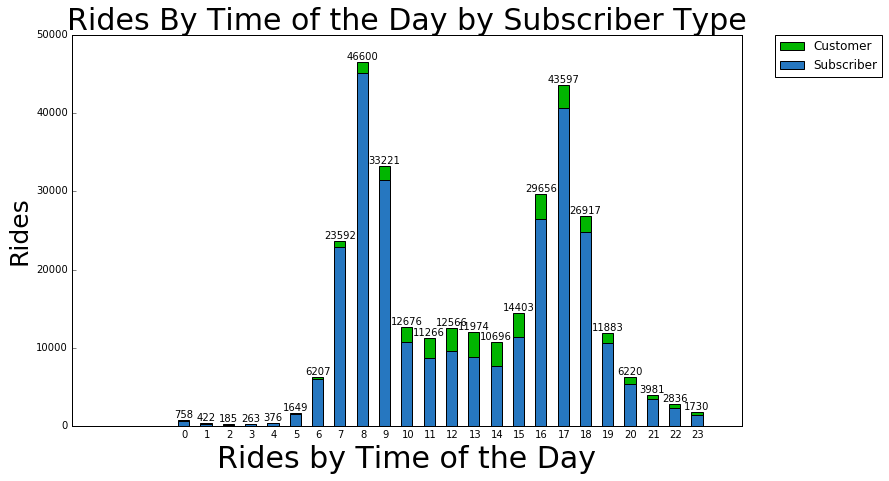

In [117]:
fig, ax = plt.subplots(figsize=(12, 7))
N = 24
customer = (ct_cus_ov[0],ct_cus_ov[1],ct_cus_ov[2],ct_cus_ov[3],ct_cus_ov[4],ct_cus_ov[5],ct_cus_mor[6],ct_cus_mor[7],ct_cus_mor[8],ct_cus_mor[9],ct_cus_day[10],ct_cus_day[11],ct_cus_day[12],ct_cus_day[13],ct_cus_day[14],ct_cus_aft[15],ct_cus_aft[16],ct_cus_aft[17],ct_cus_aft[18],ct_cus_ngt[19],ct_cus_ngt[20],ct_cus_ngt[21],ct_cus_ngt[22],ct_cus_ngt[23])
subscriber = (ct_sub_ovngt[0],ct_sub_ovngt[1],ct_sub_ovngt[2],ct_sub_ovngt[3],ct_sub_ovngt[4],ct_sub_ovngt[5],ct_sub_mor[6],ct_sub_mor[7],ct_sub_mor[8],ct_sub_mor[9],ct_sub_day[10],ct_sub_day[11],ct_sub_day[12],ct_sub_day[13],ct_sub_day[14],ct_sb_aft[15],ct_sb_aft[16],ct_sb_aft[17],ct_sb_aft[18],ct_sub_ngt[19],ct_sub_ngt[20],ct_sub_ngt[21],ct_sub_ngt[22],ct_sub_ngt[23])
Sum = ('ct_ovngt','ct_mor','ct_day','ct_aft','ct_ngt')
ind = np.arange(N)
width = 0.5

# create a plot
p1 = plt.bar(ind, customer, width, color = '#01B500',align = 'center',bottom = subscriber)
p2 = plt.bar(ind, subscriber, width, color = '#2677C0',align = 'center')

for r1,r2 in zip(p1,p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x()+r1.get_width()/2., h1+h2, '%d'% (h1+h2), ha = 'center', va='bottom')

plt.ylabel('Rides',fontsize='30')
plt.xlabel('Rides by Time of the Day',fontsize='30')
ax.yaxis.label.set_size(25)
plt.title('Rides By Time of the Day by Subscriber Type',fontsize='30')
plt.xticks(ind+width/12., (pd_sub.index))
#plt.yticks(count_wkd.values)
plt.legend((p1[0], p2[0]), ('Customer', 'Subscriber'), loc = 2, frameon = 'false',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tick_params(top = 'off', bottom = 'off', right = 'off')
#plt.grid(axis = 'y', linestyle = '-')

plt.show()


## Among subscribers we see spikes in use at 8am and 5pm with another small bump at 12 noon. These users must be riding a bike to get to work, to go to lunch, and to head home. Whereas, Customers hourly usage seemspeaking at two in the afternoon. There doesn't seem to be a lunchtime rise among customer use. These users must be riding around throughout the daytime at their leisure. From these usage behaviors, it would be fair to characterize the two groups of subscribers and customers as commuters and tourists, respectively.

# Machine Learning

# Predicting the bay area bike share count of bikes based on the weather condition.

In [118]:
weather_df = pd.read_csv('201608_weather_data.csv')
weather_df.columns

Index([u'PDT', u'Max TemperatureF', u'Mean TemperatureF', u'Min TemperatureF',
       u'Max Dew PointF', u'MeanDew PointF', u'Min DewpointF', u'Max Humidity',
       u' Mean Humidity', u' Min Humidity', u' Max Sea Level PressureIn',
       u' Mean Sea Level PressureIn', u' Min Sea Level PressureIn',
       u' Max VisibilityMiles', u' Mean VisibilityMiles',
       u' Min VisibilityMiles', u' Max Wind SpeedMPH', u' Mean Wind SpeedMPH',
       u' Max Gust SpeedMPH', u'PrecipitationIn', u' CloudCover', u' Events',
       u' WindDirDegrees', u'ZIP'],
      dtype='object')

In [119]:
trip_df = df4
trip_df.columns

Index([u'Trip ID', u'Duration', u'Start Date', u'Start Station',
       u'Start Terminal', u'End Date', u'End Station', u'End Terminal',
       u'Bike #', u'Subscriber Type', u'Zip Code', u'Weekday'],
      dtype='object')

In [120]:
weather_df['PDT'] = weather_df['PDT'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

In [121]:
trip_df['Start Date'] = trip_df['Start Date'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))

In [122]:
def sliceWeekdayAndWeekend(df, on='PDT'):
    weekday_mask = df[on].weekday() < 5
    weekend_mask = df[on].weekday() >= 5
    return df.loc[weekday_mask], df.loc[weekend_mask]

In [123]:
def sliceGoodAndBadWeatherDay(df):
    bad_weather_mask = df[' Events'] < 0
    good_weather_mask = df[' Events'] >= 0
    return df.loc[bad_weather_mask], df.loc[good_weather_mask]

In [124]:
def convertEventToInt(val):
    if val is np.nan:
         return 0
    elif ('Rain' in val) or ('Fog' in val) or ('Fog-Rain' in val) or ('Rain-Thunderstorm' in val):
         return -1
    else:
        return 2

In [125]:
trip = trip_df.copy()

In [126]:
weather = weather_df.copy()

In [127]:
weather[' Events'] = weather[' Events'].apply(convertEventToInt)

In [128]:
weather[' Events'].unique()

array([ 0, -1], dtype=int64)

In [129]:
weather['PrecipitationIn'] = weather['PrecipitationIn'].apply(lambda x: 0.01 if x == 'T' else x)

In [130]:
weather['PrecipitationIn'] = weather['PrecipitationIn'].astype('float64')

In [131]:
trip['Date'] = trip['Start Date'].apply(lambda x: x.date())
#trip

In [132]:
weather['PDT'] = weather['PDT'].apply(lambda x: x.date())

In [133]:
weather['ZIP'] = weather['ZIP'].astype('str')

In [134]:
weather.fillna(weather.mean(), inplace=True)

,PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,ZIP
0,2015-09-01,75,67,58,58,56,54,84,67,49,...,10.0,6.0,22,9,26.000000,0.00,2,0,245,94107
1,2015-09-02,73,68,62,59,56,54,78,68,57,...,10.0,10.0,23,12,26.000000,0.00,5,0,249,94107
2,2015-09-03,70,65,60,57,54,50,84,69,53,...,10.0,10.0,18,12,25.000000,0.00,2,0,250,94107
3,2015-09-04,72,64,55,52,50,48,77,61,44,...,10.0,7.0,20,10,24.000000,0.00,2,0,233,94107
4,2015-09-05,79,65,51,53,48,44,89,60,30,...,10.0,10.0,21,7,24.000000,0.00,2,0,289,94107
5,2015-09-06,84,68,52,53,47,31,72,44,16,...,10.0,10.0,14,5,17.000000,0.00,3,0,280,94107
6,2015-09-07,91,73,54,56,46,37,67,42,16,...,10.0,9.0,13,5,15.000000,0.00,1,0,307,94107
7,2015-09-08,95,76,57,54,46,38,67,43,19,...,10.0,10.0,14,6,17.000000,0.00,0,0,315,94107
8,2015-09-09,93,77,60,58,50,44,73,47,21,...,10.0,10.0,16,5,18.000000,0.00,0,0,302,94107
9,2015-09-10,89,74,59,59,56,53,84,59,34,...,10.0,10.0,16,6,18.000000,0.00,2,0,298,94107


### Sum up share count with same day and same zip_code.

In [135]:
count_per_day = trip.groupby(['Date', 'Zip Code']).size()

In [136]:
count_per_day.rename('count', inplace=True)

Date        Zip Code
2015-09-01  10010        1
            10070        2
            1210         2
            19127        2
            19134        2
            21113        3
            2132         1
            28803        2
            33408        1
            38133        2
            43214        2
            45403        3
            49424        1
            53092        1
            60061        1
            60622        1
            6907         2
            77019        3
            78233        1
            80206        3
            80424        2
            80435        2
            84105        1
            89113        1
            89166        1
            89451        2
            90007        2
            9069         2
            91710        3
            92130        1
                        ..
2016-08-31  95111        2
            95112       17
            95113        6
            95116        1
            95118        2
       

In [137]:
count_per_day = count_per_day.to_frame().reset_index()

In [138]:
count_per_day

,Date,Zip Code,count
0,2015-09-01,10010,1
1,2015-09-01,10070,2
2,2015-09-01,1210,2
3,2015-09-01,19127,2
4,2015-09-01,19134,2
5,2015-09-01,21113,3
6,2015-09-01,2132,1
7,2015-09-01,28803,2
8,2015-09-01,33408,1
9,2015-09-01,38133,2


In [139]:
weather.rename(columns={'PDT': 'Date', 'ZIP': 'Zip Code'}, inplace=True)

In [140]:
whole_dataset = weather.merge(count_per_day, on=['Date', 'Zip Code'])

In [141]:
whole_dataset['isWeekend'] = whole_dataset['Date'].apply(lambda x: False if x.weekday() < 5 else True)

### The prediction will work with weekday data

In [142]:
weekday_df = whole_dataset[whole_dataset['isWeekend'] == False]

In [143]:
bad_weather, good_weather = sliceGoodAndBadWeatherDay(weekday_df)

In [144]:
bad_weather.drop(['Date','Zip Code','isWeekend',' Events'], axis=1, inplace=True)
good_weather.drop(['Date','Zip Code','isWeekend',' Events'], axis=1, inplace=True)

C:\Users\Tjpat\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Tjpat\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [145]:
def sliceXandY(df):
    x = df.ix[:, :' WindDirDegrees']
    y = df.ix[:, 'count']
    return x, y

In [146]:
def sampleDataset(df, in_frac=0.12, in_random_state=22):
    return df.sample(frac=in_frac, random_state=in_random_state)

### Sample good weather due to imbalanced

In [147]:
good_weather_sample = sampleDataset(good_weather, in_frac=0.12, in_random_state=randint(0,32767))

In [148]:
learning_dataset = pd.concat([good_weather_sample, bad_weather])

In [149]:
x, y = sliceXandY(learning_dataset)

## Standardize learning_dataset, then use the dataset to generate training & testing data.¶

In [150]:
Xs_train, Xs_test, y_train, y_test = train_test_split(scale(x), y, test_size=0.7)#, random_state=randint(0,32767))

## Feature select and predict the share count with Lasso and Linear Regression.

### Lasso Regression.

In [151]:
lasso_model = linear_model.Lasso()

In [152]:
lasso_model.fit(Xs_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
lasso_model.coef_

array([  2.47275659,   0.        ,  -5.97521469,  -0.        ,
         4.43169044,   0.        ,   0.        ,   0.        ,
         6.65622714,  -0.        ,   0.        ,   8.05008389,
        -1.85118912,   5.46114149,   1.79016215,  16.30365817,
         8.14218048,  -8.47681259,  -1.33669137,  -0.        ,   0.60921854])

In [154]:
lasso_model.score(Xs_train,y_train)

0.24128867934891629

In [155]:
lasso_model.fit(Xs_test,y_test)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
lasso_model.coef_

array([  0.        ,   0.        ,  -3.21565254,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   4.74089333,
        -0.47188568,  -0.        ,   1.2429154 ,  10.40552418,
         2.97127318,  -7.11250635,  -4.58314266,   4.08842268,  -0.21261045])

In [157]:
lasso_model.score(Xs_test,y_test)

0.14060236140529025

### The above part expalins the R^2 and also which parameters to be taken into consideration for boosting the share count of by area bike

### The coefficient of determination R^2 of the prediction.The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

### Linear Regression

In [160]:
lin_model = linear_model.LinearRegression()

In [161]:
lin_model.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
lin_model.coef_

array([-25.15614288,  81.13858532, -62.9942362 , -20.41654578,
        34.51220185, -14.0060907 ,  -5.35221949,  13.06399832,
        10.3831243 , -27.69824894,  32.07687455,   0.78354681,
        -8.52311414,  13.41089283,  -4.44526644,  18.52190505,
        14.78019157,  -9.18097753,   0.31117172,   1.91853545,   1.18650212])

In [163]:
lin_model.score(Xs_train,y_train)

0.32082184605664044

In [164]:
lin_model.fit(Xs_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
lin_model.coef_

array([-32.41573735,  70.42240112, -44.42958398,  -6.66531844,
         8.66595575,  -5.5971352 ,   1.62008316,  -4.82395816,
         6.30034298, -14.88278972,  20.69775834,  -1.99692925,
        -1.10637246,  -3.13412646,   3.24507828,  12.91035806,
         4.24233282, -10.02138844,  -4.93619062,   8.35136346,  -0.45404449])

In [166]:
lin_model.score(Xs_test,y_test)

0.1910097105667351

In [169]:
x.columns

Index([u'Max TemperatureF', u'Mean TemperatureF', u'Min TemperatureF',
       u'Max Dew PointF', u'MeanDew PointF', u'Min DewpointF', u'Max Humidity',
       u' Mean Humidity', u' Min Humidity', u' Max Sea Level PressureIn',
       u' Mean Sea Level PressureIn', u' Min Sea Level PressureIn',
       u' Max VisibilityMiles', u' Mean VisibilityMiles',
       u' Min VisibilityMiles', u' Max Wind SpeedMPH', u' Mean Wind SpeedMPH',
       u' Max Gust SpeedMPH', u'PrecipitationIn', u' CloudCover',
       u' WindDirDegrees'],
      dtype='object')

### The above part expalins the R^2 and also which parameters to be taken into consideration for boosting the share count of by area bike

### 1) Regression model suggests that weather such as Mean Temperature, Mean Sea Level Pressure can have the maximum impact on share count 
### 2) Parameters like Mean Dew point, Min Humidity, Wind Speed, Gust Speed and cloud Cover can also have impact on share count